In [1]:
__author__ = '@Tssp'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=17
plt.rcParams['ytick.labelsize']=17
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=20

In [12]:
# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
DfDict = {}
for i in range(1, 10):
    try:
        DfDict[f'{i}Fw'] = pd.read_csv(CsvPath + f'ErrorsRNN{i}Fw.csv')
    except:
        continue

In [13]:
Tabla = DfDict['1Fw']
Tabla.head()

,Rn,BCN,PMP,ZGZ,HSC
0,9.494833,8.512611,8.685498,8.591909,8.616030
1,8.455723,8.600162,9.072327,10.179135,9.062270
2,8.937767,8.170083,8.620095,8.596703,9.895447
3,8.623241,8.509555,9.183158,8.163978,9.023259
4,8.551131,8.709447,8.744688,8.592677,9.115809


In [14]:
Tabla[Tabla['Rn'] < 8.4].to_csv('./Rn.csv')

In [15]:
cities = ['BCN', 'PMP', 'ZGZ', 'HSC']
def getMinMeanErrors(DfDict, cities):
    outputCities = []
    outputRn = []
    for nFw in DfDict.keys():
        CityErrors = []
        outputRn.append(DfDict[nFw].describe()['Rn']['mean'])
        for city in cities:
            CityErrors.append(DfDict[nFw].describe()[city]['mean'])
        outputCities.append(np.min(CityErrors))
    return outputCities, outputRn

In [16]:
minsMeanCities, meanRn = getMinMeanErrors(DfDict, cities)
improvement = np.array(meanRn)/np.array(minsMeanCities)

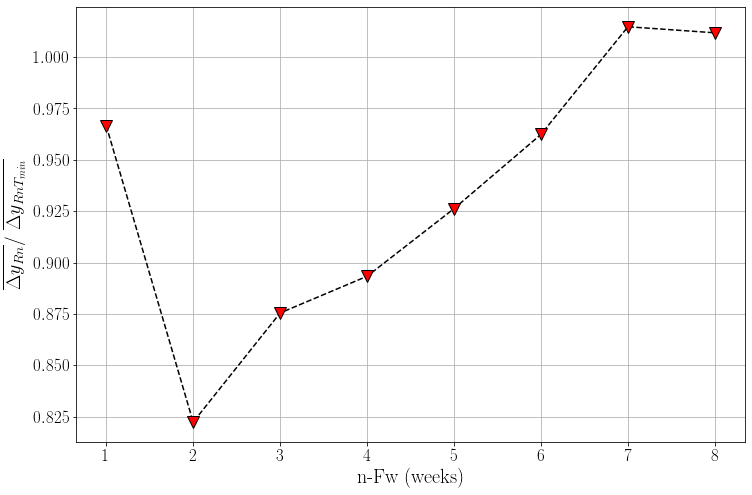

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(improvement, marker='v', markersize='12', markerfacecolor='red', markeredgecolor='k', color='k', ls='--')
ax.grid()
ax.set_xticks(range(0, 8))
ax.set_xticklabels(labels=[1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel('n-Fw (weeks)')
ax.set_ylabel('$\overline{\Delta y_{Rn}} / \ \overline{\Delta y_{RnT_{min}}}$')
# ax.set_ylim([1, 1.2])
plt.savefig('../Figures/Paper/ImprovementLSTM.eps', dpi=200)

# All Together

In [4]:
# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
DfDictANN = {}
for i in range(1, 10):
    try:
        DfDictANN[f'{i}Fw'] = pd.read_csv(CsvPath + f'ErrorsANN{i}Fw.csv')
    except:
        continue
minsMeanCities, meanRn = getMinMeanErrors(DfDictANN, cities)
improvementANN = np.array(meanRn)/np.array(minsMeanCities)

In [5]:
# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
DfDictCNN = {}
for i in range(1, 10):
    try:
        DfDictCNN[f'{i}Fw'] = pd.read_csv(CsvPath + f'ErrorsCNN{i}Fw.csv')
    except:
        continue
minsMeanCities, meanRn = getMinMeanErrors(DfDictCNN, cities)
improvementCNN = np.array(meanRn)/np.array(minsMeanCities)

In [6]:
# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
DfDictLSTM = {}
for i in range(1, 10):
    try:
        DfDictLSTM[f'{i}Fw'] = pd.read_csv(CsvPath + f'ErrorsRNN{i}Fw.csv')
    except:
        continue
minsMeanCities, meanRn = getMinMeanErrors(DfDictLSTM, cities)
improvementLSTM = np.array(meanRn)/np.array(minsMeanCities)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


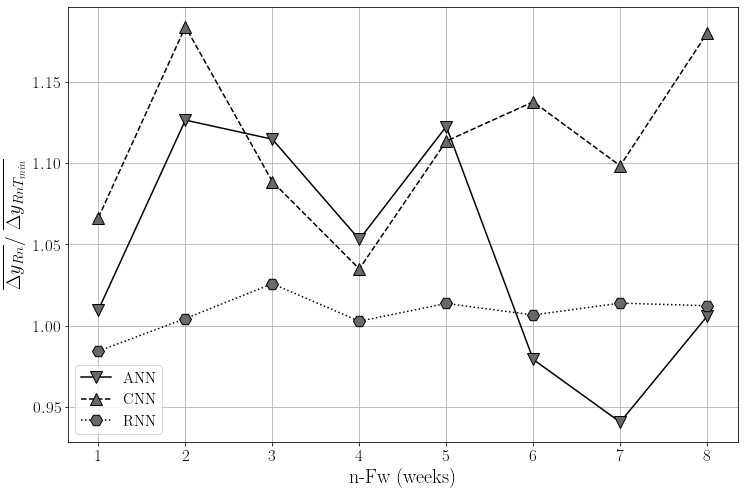

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(improvementANN, marker='v', markersize='12', markerfacecolor='dimgray', markeredgecolor='k', color='k', ls='-')
ax.plot(improvementCNN, marker='^', markersize='12', markerfacecolor='dimgray', markeredgecolor='k', color='k', ls='--')
ax.plot(improvementLSTM, marker='H', markersize='12', markerfacecolor='dimgray', markeredgecolor='k', color='k', ls=':')
ax.grid()
ax.set_xticks(range(0, 8))
ax.set_xticklabels(labels=[1, 2, 3, 4, 5, 6, 7, 8])
ax.set_xlabel('n-Fw (weeks)')
ax.set_ylabel('$\overline{\Delta y_{Rn}} / \ \overline{\Delta y_{RnT_{min}}}$')
plt.legend(['ANN', 'CNN', 'RNN'], fontsize=15)
# ax.set_ylim([1, 1.2])
plt.savefig('../Figures/Paper/Improvement_ANN_CNN_RNN_wcolor.eps', dpi=200)
